<a href="https://colab.research.google.com/github/kvalaroutsos/tensorflow_cnn/blob/main/04_transfer_learning_efficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download and becme one with the data
# Get the data only 10% of the previous data.
import zipfile
#10% data
#!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

#All data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip 
#zip_ref=zipfile.ZipFile('10_food_classes_10_percent.zip')
zip_ref=zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

--2023-03-17 08:45:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 64.233.170.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.3’

10_food_classes_all 100%[===================>] 495.13M  22.5MB/s    in 22s     

2023-03-17 08:45:41 (22.0 MB/s) - ‘10_food_classes_all_data.zip.3’ saved [519183241/519183241]



In [ ]:
# How many images in each folder
import os

#Walk through 10 precent data directory and list number of files
# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/train.
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak.
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi.
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings.
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream.
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen.
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza.
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice.
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry.
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger.
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon.
There are 10 directorie

In [ ]:
# Set up data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE=(224,224)
BATCH_SIZE=32

train_dir='/content/10_food_classes_all_data/train'
test_dir='/content/10_food_classes_all_data/test'

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

print('Train images:')
train_data_all_data=train_datagen.flow_from_directory(train_dir,
                                                        target_size=IMAGE_SHAPE,
                                                        batch_size=BATCH_SIZE,
                                                        class_mode='categorical')
print('Testing images:')
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=IMAGE_SHAPE,
                                           batch_size=32,
                                           class_mode='categorical')

Train images:
Found 7500 images belonging to 10 classes.
Testing images:
Found 2500 images belonging to 10 classes.


In [ ]:
# Let 's get the class names
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# Create tensorboard callback
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir=dir_name + '/'+ experiment_name + '/' + datetime.datetime.now().strftime('%Y-%m%d-%H%M')
  tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f'Saving TesorBoard log files to: {log_dir}')
  return tensorboard_callback

In [ ]:
resnet_url= 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'

efficientnet_url= 'https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1'

In [ ]:
# import dependacies
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
# Lets create a model function to create a model from a URL
def create_model(model_url, num_classes=10):  # There are 10 types of food
  """
  Takes a TensorFlow HUB URL and creates a Keras Sequential model with it.
  Args:
  model_url(str): A Tensorflow Hub feature extraction URL.
  num_classes (int): Number of output neurons in the output layers, shoulf be equal to number of target calssses default 10.

  Returns: 
  An uncompilee Keras Sequential model with model_url as feature extractor layer and Dense output layer with num_classes output neurons.
  """

  # Download the pretraine model and save it as a keras layer
  feature_extractor_layers=hub.KerasLayer(model_url,
                                           trainable=False,  # Freeze the already learned patterns
                                           name='feature_extractor_layers',
                                           input_shape=IMAGE_SHAPE+(3,)   # ADD the color chanel in the previous tupple
                                                                      
                                           )

  # Create our model
  model=tf.keras.Sequential([
      feature_extractor_layers,
      layers.Dense(num_classes, activation='softmax', name='output_layer')
  ])
  return model


In [ ]:
# Create EfficientNet odel

efficient_net_model=create_model(efficientnet_url
                          )

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
efficient_net_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_layers (K  (None, 1408)             7768562   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                14090     
                                                                 
Total params: 7,782,652
Trainable params: 14,090
Non-trainable params: 7,768,562
_________________________________________________________________


In [ ]:
efficient_net_model.compile(loss='categorical_crossentropy',
                            optimizer=tf.keras.optimizers.Adam(),
                            metrics=['accuracy'])

In [ ]:
efficientnet_history=efficient_net_model.fit(train_data_all_data,
                                             epochs=2,
                                             validation_data=test_data,
                                             callbacks=[create_tensorboard_callback(dir_name='tensorflow_hub',
                                                                       experiment_name='efficientnetB2')])

Saving TesorBoard log files to: tensorflow_hub/efficientnetB2/2023-0317-0852
Epoch 1/2
235/235 [==============================] - 57s 237ms/step - loss: 0.2662 - accuracy: 0.9227 - val_loss: 0.2619 - val_accuracy: 0.9192
Epoch 2/2
235/235 [==============================] - 56s 239ms/step - loss: 0.2436 - accuracy: 0.9325 - val_loss: 0.2580 - val_accuracy: 0.9160


In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
!wget https://raw.githubusercontent.com/kvalaroutsos/cnn_funcs/main/helper.py -P /content/

--2023-03-17 09:10:13--  https://raw.githubusercontent.com/kvalaroutsos/cnn_funcs/main/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2672 (2.6K) [text/plain]
Saving to: ‘/content/helper.py.2’

helper.py.2         100%[===================>]   2.61K  --.-KB/s    in 0s      

2023-03-17 09:10:13 (60.2 MB/s) - ‘/content/helper.py.2’ saved [2672/2672]



In [ ]:
from helper import view_random_image, plot_loss_curves, load_and_prep_image, pred_and_plot

Image shape: (512, 512, 3)


array([[[ 69,  47,  50],
        [ 53,  31,  34],
        [ 46,  24,  27],
        ...,
        [ 87,  95, 116],
        [ 97, 101, 128],
        [ 95,  96, 126]],

       [[ 60,  38,  41],
        [ 44,  24,  26],
        [ 50,  30,  32],
        ...,
        [ 91,  97, 119],
        [ 94,  98, 123],
        [ 90,  90, 118]],

       [[ 58,  38,  40],
        [ 53,  34,  36],
        [ 47,  29,  29],
        ...,
        [107, 112, 132],
        [ 99,  99, 123],
        [106, 103, 130]],

       ...,

       [[ 44,  24,  26],
        [ 40,  19,  24],
        [ 30,   9,  14],
        ...,
        [ 66,  40,  77],
        [ 67,  41,  78],
        [ 54,  28,  67]],

       [[ 63,  41,  43],
        [ 49,  27,  29],
        [ 26,   4,   6],
        ...,
        [ 92,  62, 100],
        [ 74,  44,  82],
        [ 63,  35,  73]],

       [[ 86,  62,  62],
        [ 82,  58,  58],
        [ 51,  27,  27],
        ...,
        [ 85,  53,  90],
        [ 60,  30,  66],
        [ 69,  39,  75]]

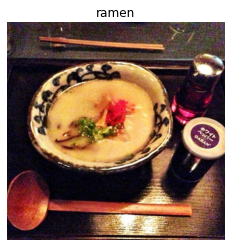

In [ ]:
view_random_image('/content/10_food_classes_all_data/train','ramen')

In [ ]:
def plot_loss_curves(history):
  """
  Import the history of a tf model
  """
  
  import matplotlib.pyplot as plt
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']

  epochs=range(len(history.history['loss']))

  #Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

    #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

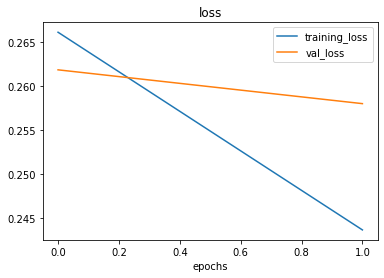

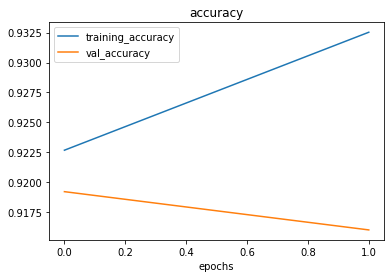

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg

--2023-03-17 09:03:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.01s   

2023-03-17 09:03:23 (311 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]



In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2023-03-17 09:03:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-03-17 09:03:27 (261 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2023-03-17 09:03:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.02s   

2023-03-17 09:03:32 (71.9 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]



In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-03-17 09:03:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2023-03-17 09:03:38 (186 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



In [ ]:
def load_and_prep_image(filename,img_shape=224):
  """
  Read the image from filename, turns it to a tensor and reshape it to (img_shape, img_shape, color_channels)
  """
  img=tf.io.read_file(filename)
  # Decode the read file to a tensor
  img=tf.image.decode_image(img)
  # Resize the image
  img=tf.image.resize(img,size=[img_shape, img_shape])
  #Rescale the image betwwen 0-1
  img=img/255.
  return img

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  THIS is for MULTICLASS and BINARY  predictions.
  Imports an image located as filename, makes a prediction with model, and
  plot the image with the predicted class as the title. 
  """
  # Import the target image and preprocess it
  img=load_and_prep_image(filename)

  # Make the prediction
  pred=model.predict(tf.expand_dims(img,axis=0))
  

  # Get the predicted class

  if len(pred[0])>1:

    pred_class=class_names[tf.argmax(pred[0])]

  else:

    pred_class=class_names[int(tf.round(pred[0]))]

  # Plot the image 
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

In [ ]:
import tensorflow as tf

1/1 [==============================] - 3s 3s/step


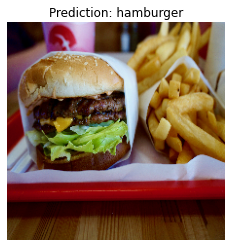

In [ ]:
pred_and_plot(efficient_net_model,'/content/03-hamburger.jpeg',class_names )

1/1 [==============================] - 0s 38ms/step


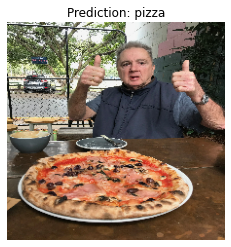

In [ ]:
pred_and_plot(efficient_net_model,'/content/03-pizza-dad.jpeg', class_names)

1/1 [==============================] - 0s 36ms/step


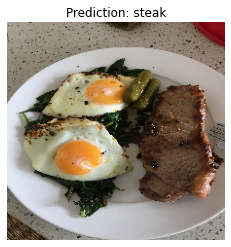

In [ ]:
pred_and_plot(efficient_net_model,'/content/03-steak.jpeg', class_names)

1/1 [==============================] - 0s 34ms/step


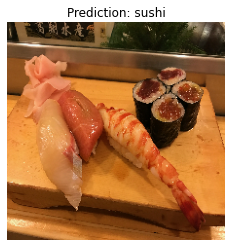

In [ ]:
pred_and_plot(efficient_net_model, '/content/03-sushi.jpeg', class_names)

In [ ]:
efficient_net_model.save('/content/drive/MyDrive/Colab_Notebooks/TENSORFLOW/food_model_efficientnetb2.h5')

# Tensorboard is installed in colab i can install it bt
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "Efficientnet vs ResNet50" \
  --description 'Comparing two different TF Hub feature extraction model architectures' \
  --one_shot
  '